Mean Squared Error: 305.2507104056536
R-squared Score: 0.9999845032273037

Feature Importances:
         Feature    Importance
4            ltp  8.565982e-01
13          Year  2.707443e-01
5           vwap  2.291626e-01
11           Day  4.118412e-03
8         VOLUME  1.458225e-06
9          VALUE  5.124442e-10
6          52W H -5.352594e-05
10  No of trades -6.238318e-05
7          52W L -5.880846e-04
3    PREV. CLOSE -9.759608e-04
2            LOW -2.192852e-02
1           HIGH -2.330295e-02
0           OPEN -3.916134e-02
12         Month -9.125117e-02


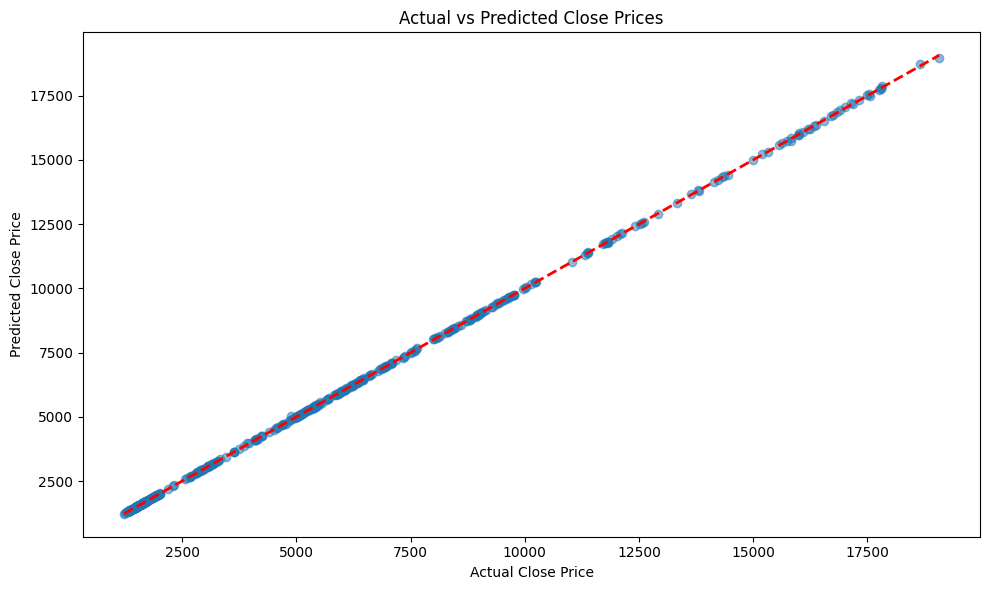

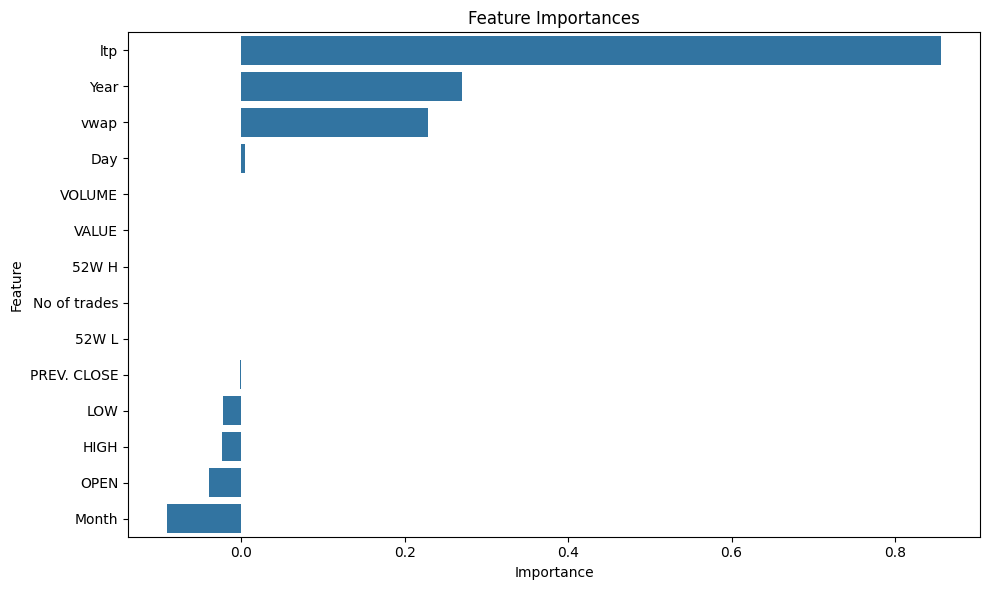

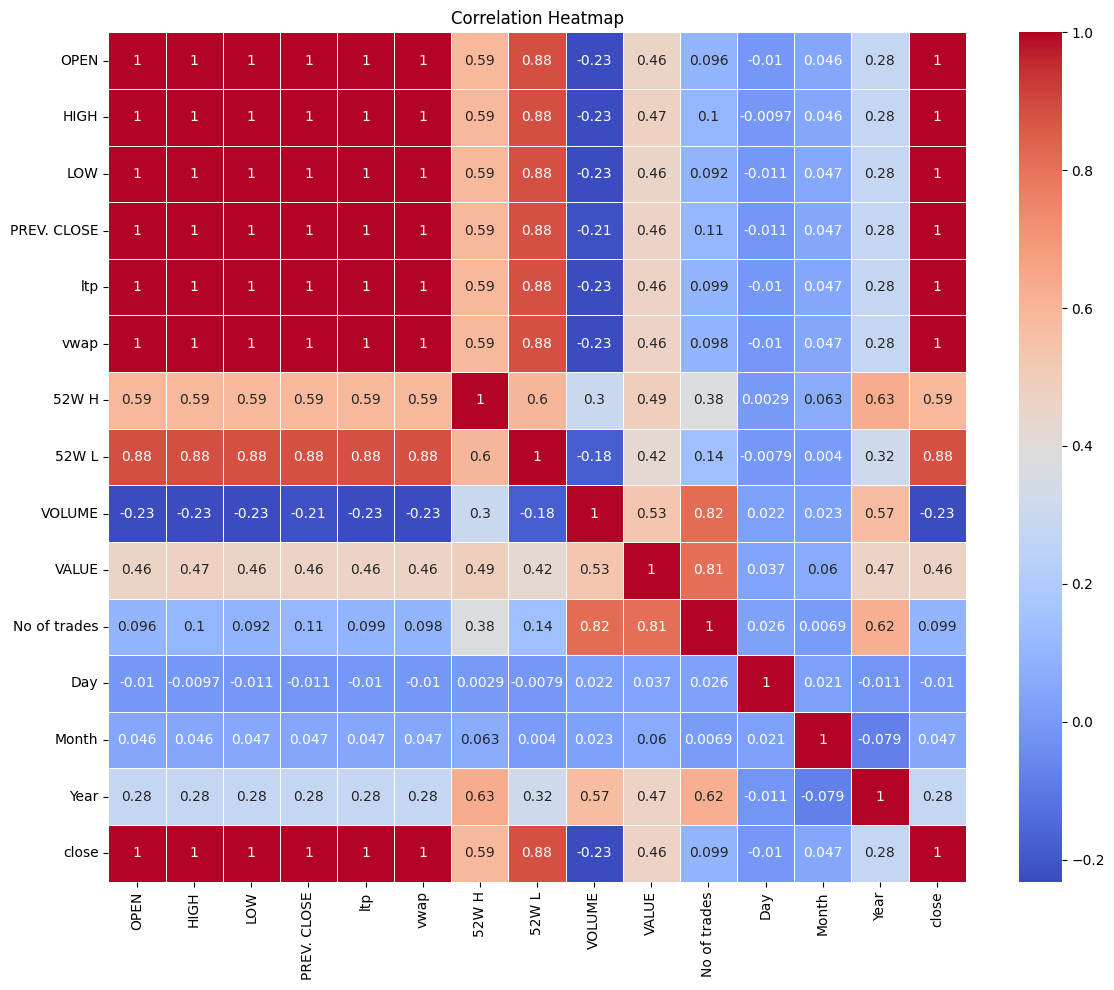

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("D:\\Neural_Network\\DataSets\\Bajaj Finserv.csv")

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Create numerical features from the date
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Select features for the model
features = ['OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades', 'Day', 'Month', 'Year']
target = 'close'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Print feature importances
feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.coef_})
print("\nFeature Importances:")
print(feature_importance.sort_values('Importance', ascending=False))

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Prices")
plt.tight_layout()
plt.show()

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.sort_values('Importance', ascending=False))
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data[features + [target]].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [22]:
last_row = data[features].iloc[-1]
last_date = data['Date'].iloc[-1]

next_date = last_date + pd.Timedelta(days=1)

# Predict the closing price for the next day
tomorrow_prediction = model.predict(last_row.values.reshape(1, -1))
print(f"Predicted closing price for {next_date.date()}: {tomorrow_prediction[0]}")

Predicted closing price for 2024-06-26: 1604.1521544230172


C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
